---

# Session 7 Part 2: Computational Skills: Optimizing Functions in Python

The shooting method requires that we have a way to optimise the solution to find were we are matching the distant boundary conditions. 

One example of this is finding the roots of an equation.

For example, finding $x$ at which a function $f(x)=0$ can be easily done.

The normal approach is to start with some guess and then iterate.

- scipy provides two functions which are helpful:
    1. `scipy.optimize.fsolve(f, x0)`
    2. `scipy.optimize.minimze(f, x0)`
    3. `scipy.optimize.basinhopping(f, x0)`

We will explore how these work below: 



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize as optimize # optimizer library

# 4.1 Finding the roots using `fsolve`

This method searches for the zero's directly from some starting guess.

Let's work with the function $y=x^3-2x^2+5$ and find the roots.

Text(0.5,1,'$y=x^3-2x^2+5$')

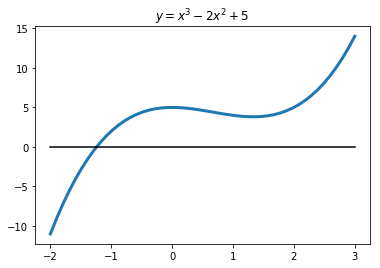

In [2]:
# we will find zeros for x^3-2*x^2+5
f = lambda x: x**3 - 2*x**2 + 5 ## fn defining problem

x=np.linspace(-2,3) # define x values for plotting

plt.plot(x, f(x), linewidth=3) # plot what function looks like.
plt.plot(x[[0,-1]],np.array([0,0]),'k')
plt.title(r'$y=x^3-2x^2+5$')

Let's start from the value -1.

I have requested the funtion to write the full output so we can see how well the function has performed.

- The first value is the estimation of the root
- The variable `fvec` is the value of the function evaluated so the value of the solution
   - It should be zero if it has found a root.

In [7]:
optimize.fsolve(f, -1.0, full_output=True)

(array([-1.24189656]),
 {'nfev': 8,
  'fjac': array([[-1.]]),
  'r': array([-9.59451165]),
  'qtf': array([-7.41316342e-10]),
  'fvec': array([0.])},
 1,
 'The solution converged.')

Let's visualise  this using the graph

SOLUTION WITH fsolve():
x^3-2x^2+5 has root at  [-1.24189656]
The solution converged.


Text(0.5,1,'$y=x^3-2x^2+5$')

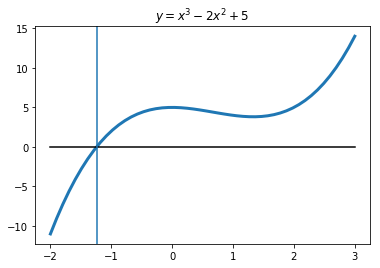

In [5]:
## find the root with an initial guess of -1.
xroot = optimize.fsolve(f, -1.0, full_output=True)

# print answer
print("SOLUTION WITH fsolve():" )
print('x^3-2x^2+5 has root at ', xroot[0])
print (xroot[3])

plt.plot(x, f(x), linewidth=3) # plot what function looks like.
plt.plot(x[[0,-1]],np.array([0,0]),'k')
plt.axvline(x=xroot[0])
plt.title(r'$y=x^3-2x^2+5$')

Now, let's start from the value +1.

I have requested the funtion to write the full output so we can see how well the function has performed.

In [8]:
optimize.fsolve(f, 1.0, full_output=True)

(array([1.33223684]),
 {'nfev': 21,
  'fjac': array([[-1.]]),
  'r': array([-0.02203082]),
  'qtf': array([-3.81482444]),
  'fvec': array([3.81481722])},
 5,
 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.')

Let's plot this solution:

 - The variable `fvec` is now greater than zero - Why?.

SOLUTION WITH fsolve():
x^3-2x^2+5 has root at  [1.33223684]
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


Text(0.5,1,'$y=x^3-2x^2+5$')

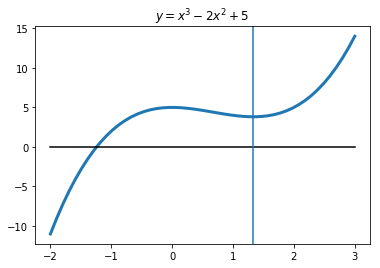

In [9]:
## find the root with an initial guess of +1.
xroot = optimize.fsolve(f, 1.0, full_output=True)

# print answer
print ("SOLUTION WITH fsolve():")
print ('x^3-2x^2+5 has root at ', xroot[0])
print (xroot[3])

plt.plot(x, f(x), linewidth=3) # plot what function looks like.
plt.plot(x[[0,-1]],np.array([0,0]),'k')
plt.axvline(x=xroot[0])
plt.title(r'$y=x^3-2x^2+5$')

---
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Nelder-Mead_Himmelblau.gif/640px-Nelder-Mead_Himmelblau.gif" align="RIGHT" width="50%">


## 4.2  Finding the Roots by converting them to a minima and using `optimize.minimize()`

We can convert the roots problem to a minimisation problem by squaring the function
  - Then the minimum value you obtain will be that closest to zero.

Minimisation is performed using `scipy.optimize.minimize`.

The default algorithm is the Nelder-Mead method


Taking the example before,

Let's define the function $f(x)=x^3-2x^2+5$

And $g(x) = f(x)^2 = (x^3-2x^2+5)^2$

Finding the root of $f(x)$ if now equivalent to finding the minimum of $g(x)$

In [10]:
# we will find zeros for x^3-x^2+5
f = lambda x: x**3 - 2*x**2 + 5 ## fn defining problem

## Next version with fminsearch
g = lambda x:f(x)**2

Text(0.5,0,'x')

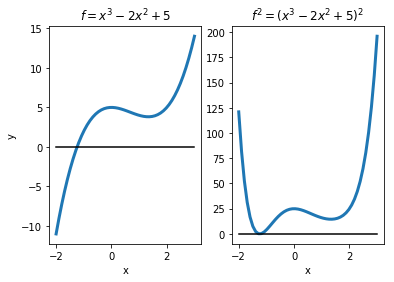

In [11]:
plt.subplot(1,2,1)
plt.plot(x, f(x), linewidth=3) # plot what function looks like.
plt.plot(x[[0,-1]],np.array([0,0]),'k')
plt.title(r'$f=x^3-2x^2+5$')
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1,2,2)
plt.plot(x, g(x), linewidth=3) # plot what function looks like.
plt.plot(x[[0,-1]],np.array([0,0]),'k')
plt.title(r'$f^2=(x^3-2x^2+5)^2$')
plt.xlabel("x")

In [13]:
x0 = -1
optimize.minimize(g, x0, method='Nelder-Mead', tol=1e-6)

 final_simplex: (array([[1.33333359],
       [1.33333282]]), array([14.55281207, 14.55281207]))
           fun: 14.552812071331577
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([1.33333359])

Let's see what happens when we start at $x=1$.

 - It still gets stuck!

## 4.3 There must be a cleaverer way!

There are many cleaverer ways!

For example, the basinhopping algorithm.

<img src="https://www.researchgate.net/profile/Irina_Hashmi/publication/260377431/figure/fig2/AS:216443955224580@1428615668331/Overview-of-Basin-Hopping-Framework-Under-the-BH-framework-the-energy-surface-is.png">

In [24]:
x0 = 1
def print_fun(x, f, accepted):
      print("at minima %.4f accepted %d" % (f, int(accepted)))
optimize.basinhopping(g, x0,stepsize=10)

                        fun: 1.0978373822186817e-17
 lowest_optimization_result:       fun: 1.0978373822186817e-17
 hess_inv: array([[0.00542706]])
      jac: array([1.43530019e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 3
     njev: 10
   status: 0
  success: True
        x: array([-1.24189656])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4110
                        nit: 100
                       njev: 1370
                          x: array([-1.24189656])

Let's go back to our original problem and play with the initial jump size defined using the `stepsize` parameter.

SOLUTION WITH basinhopping():
(x^3-2x^2+5)^2 has min at  [-1.24189656]


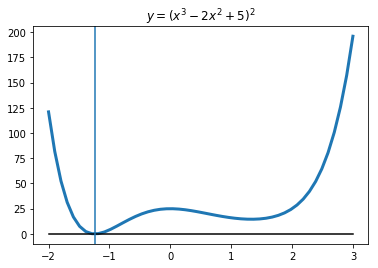

In [22]:
x0 = 1

sol = optimize.basinhopping(g, x0,stepsize=10)
xSolution = sol['x']

# print answer
print("SOLUTION WITH basinhopping():" )
print( '(x^3-2x^2+5)^2 has min at ',str(xSolution)  )

plt.plot(x, g(x), linewidth=3) # plot what function looks like.
plt.plot(x[[0,-1]],np.array([0,0]),'k')
plt.title(r'$y=(x^3-2x^2+5)^2$')

plt.axvline(x=xSolution)

# 5 EXERCISES

## 5.1 Find roots of $x^3 - 6x^2 + 4x = -12$

Modify the code examples above to find the all roots of $x^3 - 6x^2 + 4x = -12$

Start by plotting the function to find how many roots there are.

In [ ]:
## Insert your solution here



In [ ]:
## ANSWER

# we will find zeros for x^3-2*x^2+5
f = lambda x: x**3 - 6*x**2 + 4*x + 12 ## fn defining problem

x=np.linspace(-2,6) # define x values for plotting

plt.plot(x, f(x), linewidth=3) # plot what function looks like.
plt.plot(x[[0,-1]],np.array([0,0]),'k')
plt.title(r'$y=x^3-2x^2+5$')

xroot = optimize.fsolve(f, -1.0, full_output=True)

# print answer
print( "SOLUTION WITH fsolve():" )
print( 'x^3-2x^2+5 has root at ', xroot[0] )
print( xroot[3])
print( xroot[1])

plt.axvline(x=xroot[0])
plt.title(r'$y=x^3-2x^2+5$')